In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn. impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



df=pd.read_csv(r"Datsets\\Titanic-Dataset.csv")

#  Drop unnecessary columns

df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [2]:
# Basic 7 steps 

# 1.step
df.head(1) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [3]:
# 2.step
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
652,0,3,male,21.0,0,0,8.4333,S
473,1,2,female,23.0,0,0,13.7917,C
265,0,2,male,36.0,0,0,10.5000,S
325,1,1,female,36.0,0,0,135.6333,C
105,0,3,male,28.0,0,0,7.8958,S


In [4]:
# 3.step
df.shape

(891, 8)

In [5]:
# 4.step
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
# 5.step
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
# 6.step
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 7 step
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Data-Visulations

In [9]:
df.corr(numeric_only=True)['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

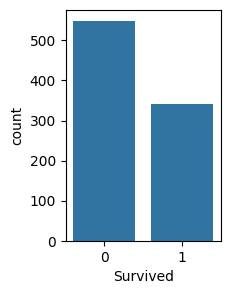

In [10]:
# Survived Correlationship
# storng correlationship in Pclass
plt.figure(figsize=(2,3))
sns.countplot(x='Survived',data=df)
plt.show()

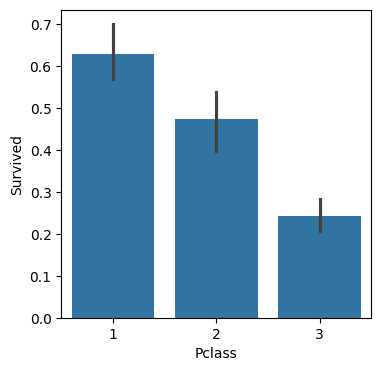

In [11]:
# pclass and Survived compare 

plt.figure(figsize=(4,4))
sns.barplot(x='Pclass', y='Survived', data=df,)
plt.show()


In [12]:
# Pclass Correlationship

# strong correlationship in 'Fare'

df.corr(numeric_only=True)['Pclass']

Survived   -0.338481
Pclass      1.000000
Age        -0.369226
SibSp       0.083081
Parch       0.018443
Fare       -0.549500
Name: Pclass, dtype: float64

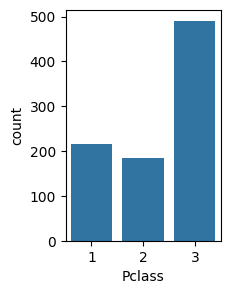

In [13]:
plt.figure(figsize=(2,3))
sns.countplot(x='Pclass',data=df)
plt.show()

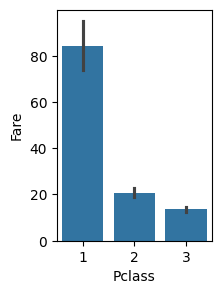

In [14]:
# strong correlationship in 'Fare' and 'pclass'

plt.figure(figsize=(2,3))
sns.barplot(x='Pclass',y='Fare',data=df)
plt.show()

In [15]:
# Age Correlationship
df.corr(numeric_only=True)['Age']

Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64

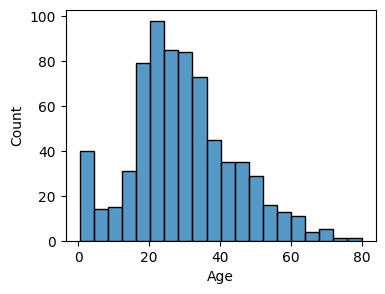

In [16]:
plt.figure(figsize=(4,3))
sns.histplot(x='Age',data=df)
plt.show()

C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

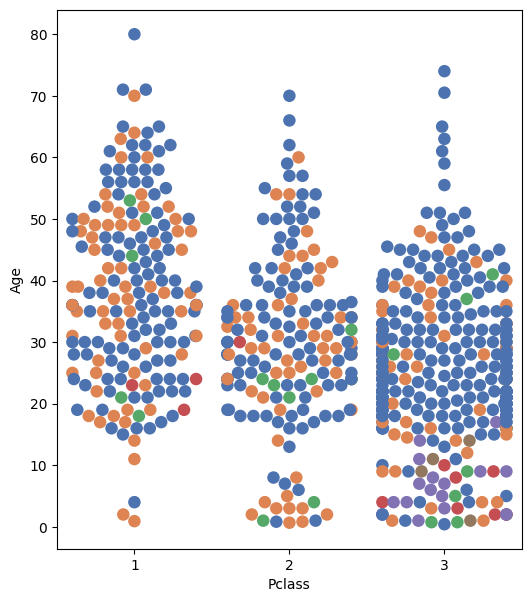

In [17]:
# strong correlationship in 'Pclass' and 'SibSp'

plt.figure(figsize=(6,7))
sns.swarmplot(x='Pclass', y='Age', hue='SibSp', data=df,size=9,palette= 'deep',legend=False)
plt.show()


In [18]:
# SibSp Correlationship
df.corr(numeric_only=True)['SibSp']

Survived   -0.035322
Pclass      0.083081
Age        -0.308247
SibSp       1.000000
Parch       0.414838
Fare        0.159651
Name: SibSp, dtype: float64

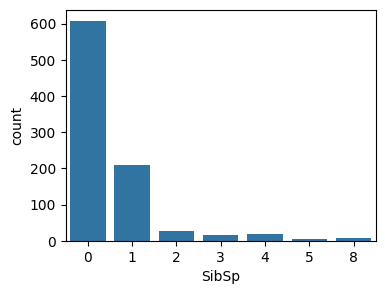

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(x='SibSp',data=df)
plt.show()

C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Tech Planet L P\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

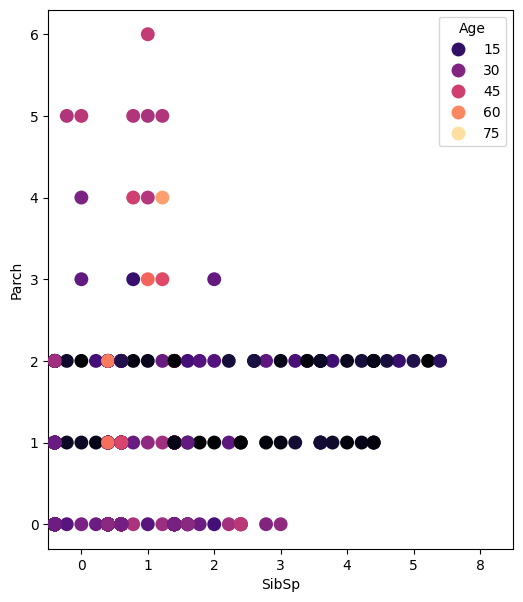

In [20]:
# strong correlationship in 'Parch' and 'Age'

plt.figure(figsize=(6,7))
sns.swarmplot(x='SibSp', y='Parch', hue='Age',data=df,size=10,palette= 'magma')
plt.show()

# Model-Train

In [21]:
# # Split the data into features and target
x = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


# ColumnTransformer

### This transformer allows you to apply different transformations to specific columns or groups of columns in an array or a pandas DataFrame.

### In simple terms:

#### 1).Each column or group of columns can have its own transformation (like scaling, encoding, or imputing missing values).
#### 2).The outputs of these transformations are then combined into a single feature set, ready for use in a machine learning model.

In [22]:
# imputation transformer
age_Embarked= ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),  # Age
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6]) # Embarked
],remainder='passthrough')

In [23]:
# one hot encoding
sex_Embarked = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6]) # Sex and Embarked
],remainder='passthrough')

In [24]:

# Scaling
scaling = ColumnTransformer([
    ('scale',StandardScaler(),[1,6])   # Sex and Embarked
])

In [25]:
# Scaling
scaling = ColumnTransformer([
    ('scale',StandardScaler(),[1,6])   # Sex and Embarked
])

In [26]:
model = DecisionTreeClassifier()

# Pipeline and make_pipeline

### A pipeline is a way to apply a series of steps (transformers) to prepare your data and, optionally, end with a model that makes predictions.

#### In simple terms:

#### 1).First, you apply transformations to clean and prepare your data (like scaling or encoding).
#### 2).Then, if you want, you can add a final step where a model is used to make predictions based on the prepared data.

In [27]:
pipe = Pipeline([
    ('trf1',age_Embarked),
    ('trf2',sex_Embarked),
    ('trf3',scaling),
    ('trf4',model)
])

In [28]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  [1, 6])])),
                ('trf4', DecisionTreeClassifier())])

In [ ]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
y_pred

In [30]:
score=accuracy_score(y_test,y_pred)
print(" Accuracy_Score: ", score)
cross_val=cross_val_score( pipe,x_train,y_train,cv=5, scoring='accuracy').mean()
print('Cross_val',cross_val)

 Accuracy_Score:  0.5865921787709497
Cross_val 0.6235989362749926


In [32]:
# ---- USER INPUT ---- #
# Collect user input

p = int(input("Enter a Pclass (1, 2, 3): "))
s = input("Enter a Sex (male, female): ").lower()
a = float(input("Enter an Age: "))
si = int(input("Enter the number of Siblings/Spouses aboard (SibSp): "))
pa = int(input("Enter the number of Parents/Children aboard (Parch): "))
fa = float(input("Enter the Fare: "))
em = input("Enter the Embarked location (C, Q, S): ").upper()

        # Combine inputs into a list
user_input = [[p, s, a, si, pa, fa, em]]  # This creates a list of lists
       

        # Convert user input to DataFrame
user_input_df = pd.DataFrame(user_input, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
       

        # Predict survival for user input
user_prediction = pipe.predict(user_input_df)

        # Output the prediction
print("User Input Prediction (0 = Did not survive, 1 = Survived):", user_prediction[0])

User Input Prediction (0 = Did not survive, 1 = Survived): 0


### User Enter a input and  new Dataset created?

In [34]:
# ---- USER INPUT ---- #


# Initialize an empty list to store all user inputs
all_user_inputs = []

try:
    while True:
        # Collect user input
        p = int(input("Enter a Pclass (1, 2, 3): "))
        s = input("Enter a Sex (male, female): ").lower()
        a = float(input("Enter an Age: "))
        si = int(input("Enter the number of Siblings/Spouses aboard (SibSp): "))
        pa = int(input("Enter the number of Parents/Children aboard (Parch): "))
        fa = float(input("Enter the Fare: "))
        em = input("Enter the Embarked location (C, Q, S): ").upper()

        # Combine inputs into a list
        user_input = [p, s, a, si, pa, fa, em]

        # Append the input to the list of all inputs
        all_user_inputs.append(user_input)

        # Ask the user if they want to input more data
        more = input("Do you want to enter another passenger? (yes/no): ").strip().lower()
        if more != 'yes':
            break

    # Convert all collected inputs to a DataFrame
    all_user_inputs_df = pd.DataFrame(all_user_inputs, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

    # Predict survival for all user inputs
    predictions = pipe.predict(all_user_inputs_df)

    # Display predictions for each input
    for i, pred in enumerate(predictions):
        print(f"Passenger {i+1} Prediction (0 = Did not survive, 1 = Survived): {pred}")

except ValueError as e:
    print("Invalid input! Please enter values in the correct format.")



Passenger 1 Prediction (0 = Did not survive, 1 = Survived): 0
Passenger 2 Prediction (0 = Did not survive, 1 = Survived): 0


In [35]:
all_user_inputs_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,female,55.0,1,1,764.0,C
1,2,male,66.0,0,1,897.0,S
